In [37]:
import pandas as pd
import numpy as np
df=pd.read_csv('Quality Assessment .csv')

In [2]:
df.isnull().sum()

Id                    0
Assembly Line         0
Quantity (lts.)       6
CO2 dissolved         0
Time limit Crossed    0
dtype: int64

In [3]:
df.duplicated().sum()

0

In [4]:
 median=df['Quantity (lts.)'].median()
print(median)

1.997947127


In [5]:
range=df['CO2 dissolved'].max()-df['CO2 dissolved'].min()
print(range)

147.92752395000002


In [6]:
Q1 = df['CO2 dissolved'].quantile(0.25)
Q3 = df['CO2 dissolved'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower cutoff values
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR
print(lower_cutoff)
print(upper_cutoff)

filtered_df =df[(df['CO2 dissolved'] >= lower_cutoff) & (df['CO2 dissolved'] <= upper_cutoff)]

10.063504929999997
18.18534705


In [7]:
Q1 = df['Quantity (lts.)'].quantile(0.25)
Q3 = df['Quantity (lts.)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower cutoff values
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR
print(lower_cutoff)
print(upper_cutoff)

filtered_df1=df[(df['CO2 dissolved'] >= lower_cutoff) & (df['CO2 dissolved'] <= upper_cutoff)]

1.8753443490000001
2.1234192689999998


In [8]:
df['Assembly Line'].nunique()

4

In [9]:
Time=df['Time limit Crossed'].astype('category')
assembly=df['Assembly Line'].astype('category')
print("Time:",Time)
print("assembly:",assembly)

Time: 0      0
1      0
2      0
3      0
4      0
      ..
294    0
295    1
296    0
297    1
298    1
Name: Time limit Crossed, Length: 299, dtype: category
Categories (2, int64): [0, 1]
assembly: 0      B
1      B
2      A
3      A
4      B
      ..
294    A
295    B
296    B
297    B
298    a
Name: Assembly Line, Length: 299, dtype: category
Categories (4, object): ['A', 'B', 'a', 'b']


In [10]:
df['Assembly Line']=df['Assembly Line'].replace({'A':'a','B':'b'})


In [11]:
df['Assembly Line'].nunique()

2

In [12]:
mean_quan=df['Quantity (lts.)'].mean()
df['Quantity (lts.)']=df['Quantity (lts.)'].fillna(mean_quan)
print(df['Quantity (lts.)'])

0      1.971072
1      2.073388
2      2.019492
3      2.004422
4      2.025784
         ...   
294    1.974539
295    1.974851
296    1.991623
297    1.935333
298    2.007043
Name: Quantity (lts.), Length: 299, dtype: float64


In [13]:
Q1 = df['Quantity (lts.)'].quantile(0.25)
Q3 = df['Quantity (lts.)'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower cutoff values
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR
print(lower_cutoff)
print(upper_cutoff)

filtered_df2=df[(df['CO2 dissolved'] >= lower_cutoff) & (df['CO2 dissolved'] <= upper_cutoff)]

1.8777194777500001
2.12145048775


In [ ]:
3

In [14]:
df['Time limit Crossed'].sum()

54

C:\Users\91850\AppData\Local\Temp\ipykernel_33188\2156662226.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity (lts.)'], ax=ax[0])


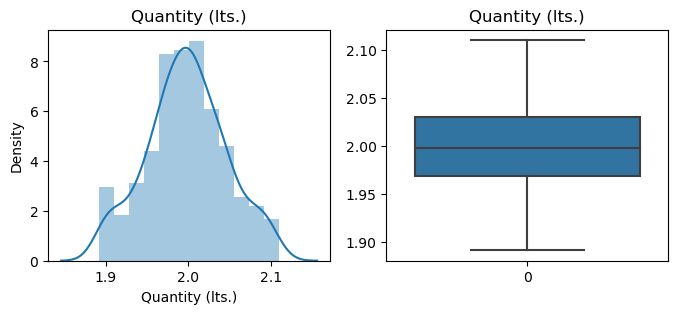

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

_, ax = plt.subplots(ncols=2, figsize=(8, 3))

sns.distplot(df['Quantity (lts.)'], ax=ax[0])
ax[0].set_title('Quantity (lts.)')

sns.boxplot(df['Quantity (lts.)'], ax=ax[1])
ax[1].set_title('Quantity (lts.)')

plt.show()

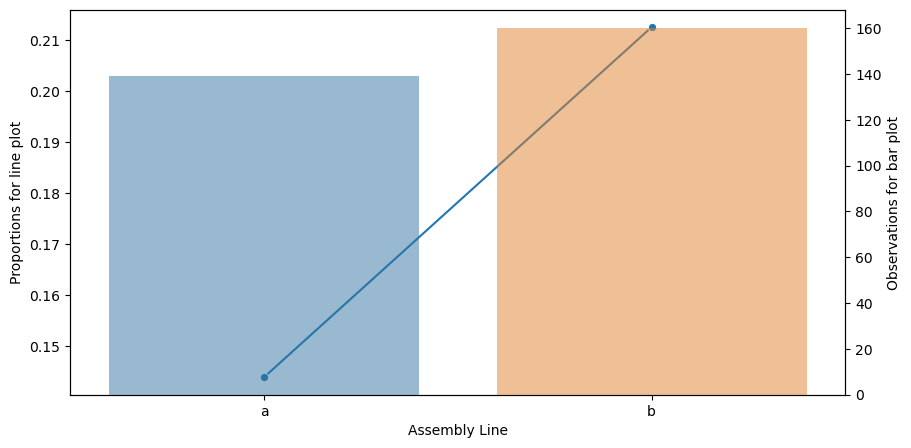

In [16]:
temp = df.groupby('Assembly Line').agg({'Time limit Crossed': ['sum', 'count']}).reset_index()
temp.columns = ['Assemble Line', 'Total Events', 'Total observations']
temp['Proportion'] = temp['Total Events'] / temp['Total observations']
temp


ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(10,5))

sns.lineplot(data = temp['Proportion'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = temp, x='Assemble Line', y='Total observations', alpha=0.5, ax=ax2)
ax1.set_xlabel('Assembly Line')
ax1.set_ylabel('Proportions for line plot')
ax2.set_ylabel('Observations for bar plot')
plt.show()

In [17]:
df_corr = df.dropna(subset=['CO2 dissolved', 'Quantity (lts.)'])

# Calculate the correlation coefficient
correlation_coefficient = df_corr['CO2 dissolved'].corr(df_corr['Quantity (lts.)'])
print(correlation_coefficient)

0.04698327968625289


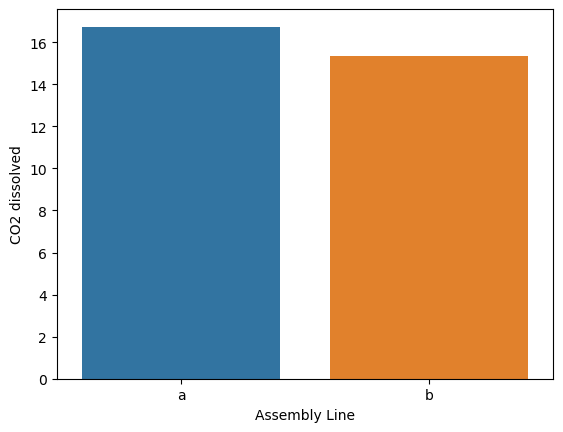

In [18]:
summ = pd.pivot_table(data = df, index = 'Assembly Line', values = 'CO2 dissolved', aggfunc='mean').reset_index()
sns.barplot(data=summ, x = 'Assembly Line', y = 'CO2 dissolved')
plt.ylabel('CO2 dissolved')
plt.show()

In [ ]:
Part 2) Identifying and excluding the outliers!

In [19]:
Q1 = df['CO2 dissolved'].quantile(0.25)
Q3 = df['CO2 dissolved'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower cutoff values
lower_cutoff = Q1 - 1.5 * IQR
upper_cutoff = Q3 + 1.5 * IQR
print(lower_cutoff)
print(upper_cutoff)

filtered_df2=df[(df['CO2 dissolved'] >= lower_cutoff) & (df['CO2 dissolved'] <= upper_cutoff)]

10.063504929999997
18.18534705


In [20]:
mean_after_treatment = filtered_df2['CO2 dissolved'].mean()
print(mean_after_treatment)

14.046175397030717


In [ ]:
 3  Understanding probability distributions and interval estimates

In [21]:
time_limit_counts = df.groupby('Assembly Line')['Time limit Crossed'].value_counts().unstack().fillna(0)

# Calculate probabilities
probabilities = time_limit_counts.div(time_limit_counts.sum(axis=1), axis=0)
print(probabilities)

Time limit Crossed         0         1
Assembly Line                         
a                   0.856115  0.143885
b                   0.787500  0.212500


In [22]:
from scipy import stats
p=0.21
n=50
k=10
binomial = stats.binom.pmf(k,n,p)
binomial

0.1377029900087001

In [23]:
p=0.14
n=50
k=10
binomial = stats.binom.pmf(k,n,p)
binomial

0.07126645856030406

In [27]:
from scipy.stats import binom
p=0.21
n=50
k=9

probability_50_both1 =1- binom.cdf(k,n,p)
print(probability_50_both1)


0.6241344530308617


In [28]:
p=0.14
n=50
k=9

probability_50_both2 =1- binom.cdf(k,n,p)
print(probability_50_both2)


0.15367658866105716


In [29]:
mean_quan=df['Quantity (lts.)'].mean()
sd_quan=df['Quantity (lts.)'].std()
print(mean_quan)
print(sd_quan)

1.9979921506177474
0.04802650818000253


In [30]:
Prob1  =  stats.norm.cdf(1.9,loc=mean_quan,scale=sd_quan)
Prob2  =  1 - stats.norm.cdf(2.1,loc=mean_quan,scale=sd_quan)
Prob1 + Prob2

0.037491895688478494

In [32]:
Prob = stats.norm.cdf(2.05,loc=mean_quan,scale=sd_quan) - stats.norm.cdf(1.95,loc=mean_quan,scale=sd_quan)
Prob

0.7017449150645626

In [55]:
mean_quan=df['Quantity (lts.)'].mean()
sd_quan=df['Quantity (lts.)'].std()

# Number of observations
n_observations = len(df)

# Degrees of freedom (n - 1 for a sample)
degrees_of_freedom = n_observations - 1

confidence_level = 0.90
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error =(z_score,degrees_of_freedom) * (sd_quan/ (n_observations ** 0.5))

# Calculate the confidence interval
confidence_interval_lower = mean_quan - margin_of_error
confidence_interval_upper = mean_quan + margin_of_error

print(confidence_interval_lower,confidence_interval_upper)


TypeError: can't multiply sequence by non-int of type 'float'

In [52]:
stats.norm.ppf((1 + confidence_level) / 2)

1.6448536269514722